In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("deliveries.csv")
df_copy=df


In [4]:
df.head()
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [5]:
columns_to_keep = ['match_id', 'venue','batting_team', 'bowling_team','striker', 'bowler', 'runs_off_bat','extras','wicket_type']
df_selected = df[columns_to_keep]

In [6]:
selected_entries = df_selected[df['bowler'] == 'TA Boult']

df_bowler = pd.DataFrame(selected_entries)

df_bowler.reset_index(drop=True, inplace=True)
df_bowler

,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,DJ Malan,TA Boult,1,0,NaN
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN
...,...,...,...,...,...,...,...,...,...
397,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TA Boult,4,0,NaN
398,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TA Boult,1,0,NaN
399,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,H Klaasen,TA Boult,1,0,NaN
400,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TA Boult,1,0,NaN


In [7]:
match_id_column = 'match_id'
batting_team_column = 'batting_team'
bowling_team_column = 'bowling_team'
striker_column = 'striker'
bowler_column = 'bowler'
runs_off_bat_column = 'runs_off_bat'
extras_column = 'extras'

unique_bowlers = df[bowler_column].unique()
bowler_data = {}
for bowler in unique_bowlers:
    bowler_data[bowler] = df[df[bowler_column] == bowler][[match_id_column, batting_team_column, bowling_team_column, striker_column, bowler_column, runs_off_bat_column, extras_column]]

# Access the data for a specific bowler (replace 'BowlerName' with the actual bowler name)
specific_bowler_data = bowler_data.get('TA Boult', pd.DataFrame())

# If you want to reset the index of each bowler's DataFrame
for bowler, data in bowler_data.items():
    data.reset_index(drop=True, inplace=True)

# Display the data for a specific bowler
print(specific_bowler_data)

     match_id  batting_team bowling_team      striker    bowler  runs_off_bat  \
0           1       England  New Zealand  JM Bairstow  TA Boult             0   
1           1       England  New Zealand  JM Bairstow  TA Boult             6   
2           1       England  New Zealand  JM Bairstow  TA Boult             1   
3           1       England  New Zealand     DJ Malan  TA Boult             1   
4           1       England  New Zealand  JM Bairstow  TA Boult             4   
..        ...           ...          ...          ...       ...           ...   
397        32  South Africa  New Zealand    DA Miller  TA Boult             4   
398        32  South Africa  New Zealand    DA Miller  TA Boult             1   
399        32  South Africa  New Zealand    H Klaasen  TA Boult             1   
400        32  South Africa  New Zealand    DA Miller  TA Boult             1   
401        32  South Africa  New Zealand    H Klaasen  TA Boult             6   

     extras  
0         0  

In [8]:
#Scraping batsman data
from bs4 import BeautifulSoup
import requests
url = 'https://www.espncricinfo.com/records/tournament/bowling-best-career-economy-rate/icc-cricket-world-cup-2023-24-15338'
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

x = soup.find_all('table')[0]
# print(len(x))
y = x.find_all('tr')
df_economy = []
for i in y:
  temp = []
  for j in i.find_all('td'):
    #  print(j.text,end=" ")
    temp.append(j.text)
  df_economy.append(temp)
df_economy=pd.DataFrame(df_economy)

def extract_first_two_words(text):
    words = text.split()
    return ' '.join(words[:2])
df_economy.columns = df_economy.iloc[0]
df_economy = df_economy.reindex(df_economy.index.drop(0))

# # Apply the function to the specified column
df_economy['Player'] = df_economy['Player'].apply(lambda x: extract_first_two_words(x))
merged_df = pd.merge(df_selected, df_economy, left_on='bowler', right_on='Player', how='inner')
merged_df = merged_df.drop(columns = ['Player','Span'])

merged_df = merged_df.rename(columns={'Ave':'Ave_bowl' , 'Runs':'Runs_given','SR':'SR_bowl','Mat':'Mat_bowl'})
merged_df


,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type,Mat_bowl,...,Balls,Runs_given,Wkts,BBI,Ave_bowl,Econ,SR_bowl,4,5,10
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,546,504,14,3/37,36.00,5.53,39.0,-,-,-
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN,10,...,546,504,14,3/37,36.00,5.53,39.0,-,-,-
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN,10,...,546,504,14,3/37,36.00,5.53,39.0,-,-,-
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,DJ Malan,TA Boult,1,0,NaN,10,...,546,504,14,3/37,36.00,5.53,39.0,-,-,-
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN,10,...,546,504,14,3/37,36.00,5.53,39.0,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14508,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,H Klaasen,TG Southee,1,0,NaN,4,...,198,256,7,3/100,36.57,7.75,28.2,-,-,-
14509,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TG Southee,6,0,NaN,4,...,198,256,7,3/100,36.57,7.75,28.2,-,-,-
14510,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TG Southee,0,0,NaN,4,...,198,256,7,3/100,36.57,7.75,28.2,-,-,-
14511,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TG Southee,1,0,NaN,4,...,198,256,7,3/100,36.57,7.75,28.2,-,-,-


In [9]:

url = 'https://www.espncricinfo.com/records/tournament/batting-highest-career-batting-average/icc-cricket-world-cup-2023-24-15338'

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

x = soup.find_all('table')[0]
# print(len(x))
y = x.find_all('tr')
df_batsman = []
for i in y:
  temp = []
  for j in i.find_all('td'):
    #  print(j.text,end=" ")
    temp.append(j.text)
  df_batsman.append(temp)
df_batsman=pd.DataFrame(df_batsman)

def extract_first_two_words(text):
    words = text.split()
    return ' '.join(words[:2])
df_batsman.columns = df_batsman.iloc[0]
df_batsman = df_batsman.reindex(df_batsman.index.drop(0))
# # # Apply the function to the specified column
df_batsman['Player'] = df_batsman['Player'].apply(lambda x: extract_first_two_words(x))
merged_df = pd.merge(merged_df, df_batsman, left_on='striker', right_on='Player', how='inner')
merged_df = merged_df.drop(columns = ['Player','Span'])
merged_df
# df_batsman

,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type,Mat_bowl,...,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11223,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,0,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0
11224,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,1,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0
11225,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,1,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0
11226,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,0,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0


In [10]:
merged_df.to_csv('output.csv', index=False)

In [11]:
# # Assuming your dataset is stored in a DataFrame named 'df'
# # You can load your dataset using pd.read_csv or another appropriate method
team1 = 'New Zealand'
team2 = 'India'
# Extract data for the specific match between IND and AUS
# a_vs_b_match = merged_df[(merged_df['batting_team'].isin([team1, team2])) & (merged_df['bowling_team'].isin([team1, team2]))]

# Create a binary column 'is_dot_ball' indicating whether the run_off_bat is 0 (dot ball) or not
merged_df['is_dot_ball'] = (merged_df['runs_off_bat'] == 0)
dot_balls_count = merged_df.groupby('bowler')['is_dot_ball'].sum().reset_index()
dot_balls_count =  dot_balls_count.rename(columns = {'bowler':'temp', 'is_dot_ball':'dots'})
dot_balls_count
merged_df = pd.merge(merged_df, dot_balls_count, left_on='bowler', right_on='temp', how='inner')
merged_df = merged_df.drop(columns='temp')

<ipython-input-12-c6d5ddf2f0c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


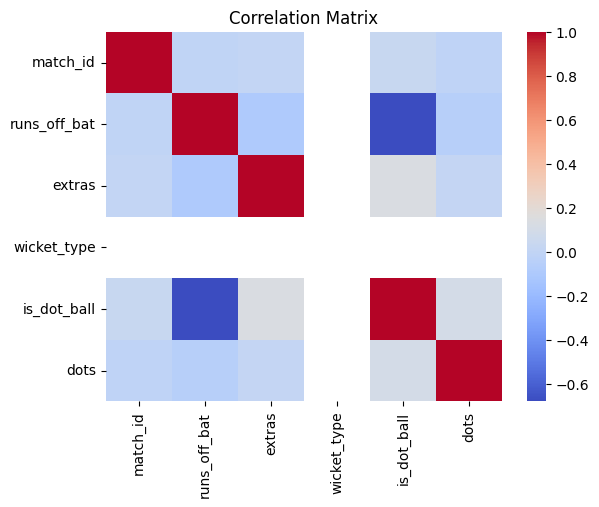

In [12]:
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix,annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
merged_df

,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type,Mat_bowl,...,Ave,BF,SR,100,50,0,4s,6s,is_dot_ball,dots
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,True,167
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,False,167
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,False,167
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,False,167
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,True,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11223,8,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Sri Lanka,Mohammad Rizwan,KIC Asalanka,1,0,NaN,9,...,65.83,414,95.41,1,1,-,38,5,False,1
11224,8,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Sri Lanka,Abdullah Shafique,KIC Asalanka,1,0,NaN,9,...,42.00,360,93.33,1,3,1,36,9,False,1
11225,8,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Sri Lanka,Abdullah Shafique,KIC Asalanka,4,0,NaN,9,...,42.00,360,93.33,1,3,1,36,9,False,1
11226,8,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Sri Lanka,Abdullah Shafique,KIC Asalanka,2,0,NaN,9,...,42.00,360,93.33,1,3,1,36,9,False,1


<ipython-input-14-c6d5ddf2f0c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


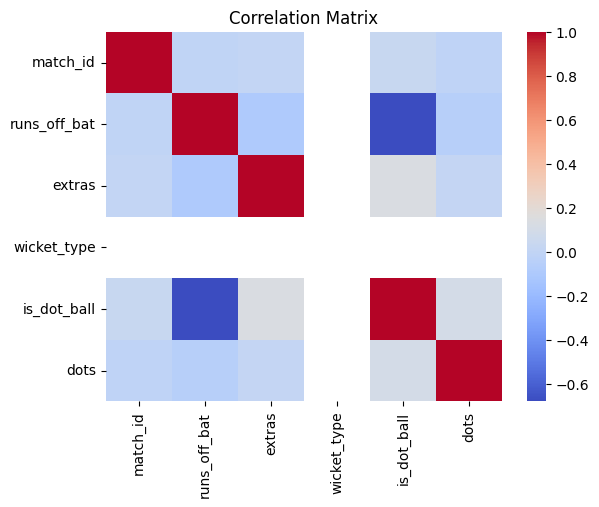

In [14]:
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix,annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
dot_balls_count = merged_df.groupby('bowler')['is_dot_ball'].sum().reset_index()

dot_balls_count = dot_balls_count.rename(columns = { 'is_dot_ball' : 'dots_count'})
# final_df = pd.merge(dot_balls_count,merged_df,left_on='bowler2',right_on='bowler',how = 'inner')
final_df = pd.merge(dot_balls_count,merged_df,on='bowler')
dot_balls_count

,bowler,dots_count
0,A Dutt,143
1,A Zampa,79
2,AAP Atkinson,25
3,AD Mathews,25
4,AK Markram,12
...,...,...
75,TG Southee,1
76,Taskin Ahmed,114
77,Usama Mir,67
78,V Kohli,0


In [16]:
df_economy

,Player,Span,Mat,Overs,Mdns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5,10
1,R Ashwin,2023-2023,1,10.0,1,60,34,1,1/34,34.00,3.40,60.0,-,-,-
2,JJ Bumrah,2023-2023,11,91.5,9,551,373,20,4/39,18.65,4.06,27.5,1,-,-
3,Mohammad Nabi,2023-2023,9,61.3,4,369,254,8,3/28,31.75,4.13,46.1,-,-,-
4,KA Maharaj,2023-2023,10,89.0,1,534,370,15,4/46,24.66,4.15,35.6,1,-,-
5,RA Jadeja,2023-2023,11,93.3,4,561,398,16,5/33,24.87,4.25,35.0,-,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Agha Salman,2023-2023,3,5.0,-,30,46,-,-,-,9.20,-,-,-,-
97,Hasan Mahmud,2023-2023,2,14.0,-,84,132,3,2/67,44.00,9.42,28.0,-,-,-
98,M Pathirana,2023-2023,2,19.0,-,114,185,2,1/90,92.50,9.73,57.0,-,-,-
99,KIC Asalanka,2023-2023,9,1.0,-,6,10,-,-,-,10.00,-,-,-,-


In [17]:
final_df = pd.merge(dot_balls_count,df_economy,left_on='bowler',right_on='Player',how='inner')
final_df = final_df.astype(int, errors='ignore')
final_df = final_df.replace('-',0)


In [18]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
le = LabelEncoder()
df_transformed = df
for column in df_transformed.columns:
    if df_transformed[column].dtype == 'object':
        df_transformed[column] = le.fit_transform(df_transformed[column])

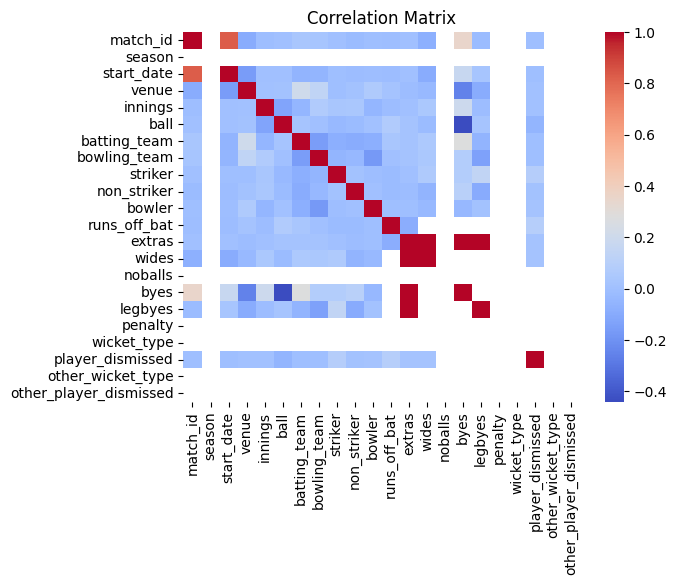

In [19]:
corr_matrix = df_transformed.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


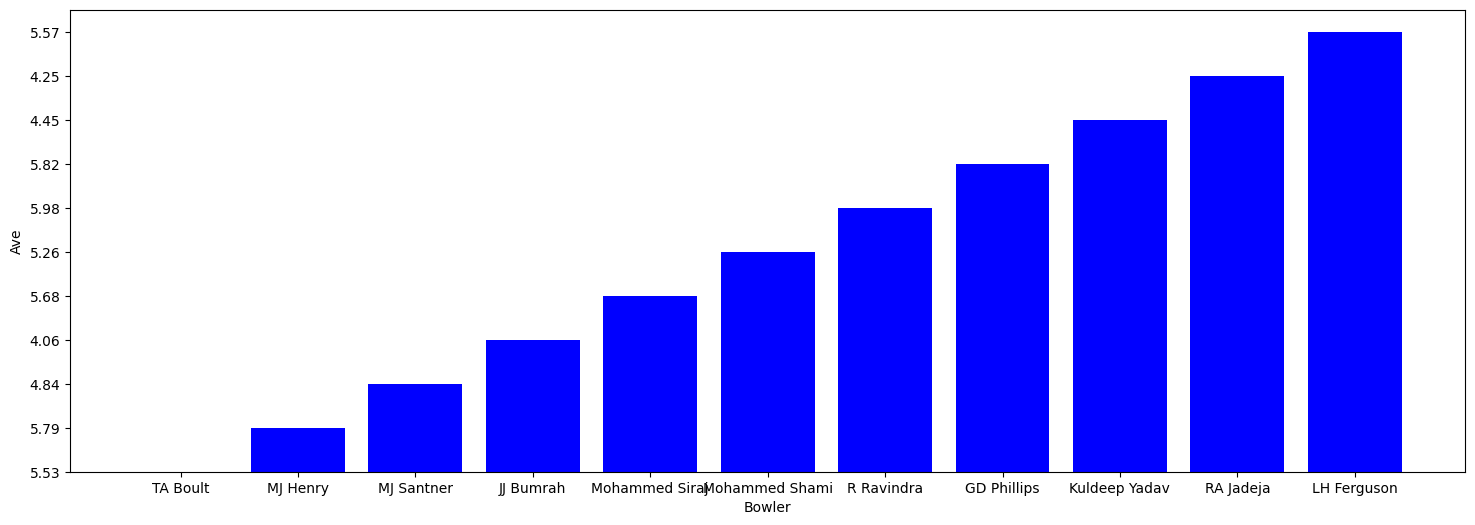

In [20]:
df_economy
team1 = 'New Zealand'
team2 = 'India'
# Extract data for the specific match between IND and AUS
a_vs_b_match = merged_df[(merged_df['batting_team'].isin([team1, team2])) & (merged_df['bowling_team'].isin([team1, team2]))]
df_unique = a_vs_b_match.drop_duplicates(subset=['bowler'])
df_unique
plt.figure(figsize=(18, 6))
plt.bar(df_unique['bowler'], df_unique['Econ'], color='blue')

# Add labels and title
plt.xlabel('Bowler')
plt.ylabel('Ave')
# Show the plot
plt.show()

In [21]:
dot_balls_count = merged_df.groupby('striker')['is_dot_ball'].sum().reset_index()

dot_balls_count = dot_balls_count.rename(columns = { 'is_dot_ball' : 'dots_count'})


In [22]:
final_df_batsman = pd.merge(dot_balls_count,df_batsman,left_on='striker',right_on='Player',how='inner')
final_df_batsman = final_df_batsman.astype(int, errors='ignore')
final_df_batsman = final_df_batsman.replace('-',0)
final_df_batsman

,striker,dots_count,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,A Zampa,29,A Zampa,2023-2023,11,6,3,48,29,16.00,60,80.00,0,0,1,5,0
1,AAP Atkinson,10,AAP Atkinson,2023-2023,3,3,1,37,35,18.50,23,160.86,0,0,1,7,0
2,AK Markram,100,AK Markram,2023-2023,10,10,1,406,106,45.11,366,110.92,1,3,0,44,9
3,AT Nidamanuru,59,AT Nidamanuru,2023-2023,7,7,1,164,54,27.33,167,98.20,0,1,0,11,10
4,AU Rashid,37,AU Rashid,2023-2023,9,9,3,92,20,15.33,91,101.09,0,0,0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Towhid Hridoy,70,Towhid Hridoy,2023-2023,7,6,1,164,74,32.80,210,78.09,0,1,0,7,5
82,V Kohli,167,V Kohli,2023-2023,11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
83,Vikramjit Singh,90,Vikramjit Singh,2023-2023,6,6,0,98,52,16.33,150,65.33,0,1,0,12,1
84,W Barresi,21,W Barresi,2023-2023,4,4,0,83,41,20.75,112,74.10,0,0,0,11,1


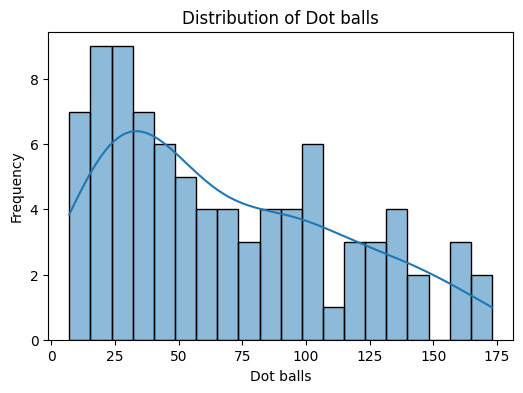

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(final_df_batsman['dots_count'], bins=20, kde=True)
plt.title('Distribution of Dot balls')
plt.xlabel('Dot balls')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='dots_count'>

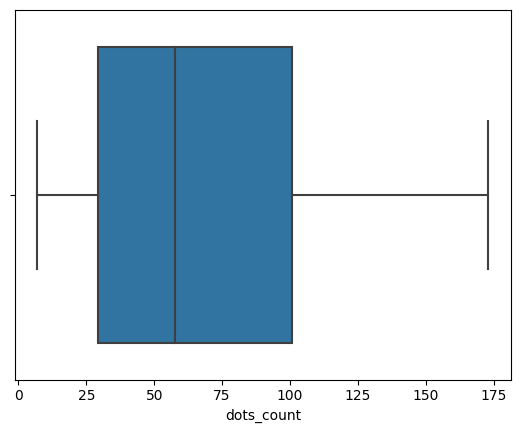

In [24]:
sns.boxplot(x=final_df_batsman['dots_count'], data=final_df_batsman)

In [25]:
df=pd.read_csv('deliveries.csv')
df = pd.merge(df,df_batsman,left_on='striker',right_on ='Player',how='inner')
df.to_csv('output_powerplay.csv', index=False)

In [26]:
# filtered_df = df[(df['ball'] >= 0.1) & (df['ball'] <= 5.8)]
filtered_df = df
filtered_df['wicket_type'] = filtered_df['wicket_type'].astype(float)
runs_scored = filtered_df.groupby('striker')['runs_off_bat'].sum().reset_index()
wkts_taken = filtered_df.groupby('bowler')['wicket_type'].sum().reset_index()
filtered_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,1,2023/24,05/10/23,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,215,59,23.88,243,88.47,-,2,1,27,3
1,1,2023/24,05/10/23,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,215,59,23.88,243,88.47,-,2,1,27,3
2,1,2023/24,05/10/23,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,215,59,23.88,243,88.47,-,2,1,27,3
3,1,2023/24,05/10/23,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,215,59,23.88,243,88.47,-,2,1,27,3
4,1,2023/24,05/10/23,"Narendra Modi Stadium, Ahmedabad",1,0.6,England,New Zealand,JM Bairstow,DJ Malan,...,215,59,23.88,243,88.47,-,2,1,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13513,29,2023/24,29/10/23,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,49.2,India,England,Kuldeep Yadav,JJ Bumrah,...,19,10,19.00,31,61.29,-,-,-,1,0
13514,29,2023/24,29/10/23,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,49.3,India,England,Kuldeep Yadav,JJ Bumrah,...,19,10,19.00,31,61.29,-,-,-,1,0
13515,29,2023/24,29/10/23,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,49.4,India,England,Kuldeep Yadav,JJ Bumrah,...,19,10,19.00,31,61.29,-,-,-,1,0
13516,29,2023/24,29/10/23,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,49.6,India,England,Kuldeep Yadav,JJ Bumrah,...,19,10,19.00,31,61.29,-,-,-,1,0


In [27]:
wkts_taken = pd.merge(wkts_taken,df_economy,left_on='bowler',right_on='Player',how='inner')
wkts_taken

,bowler,wicket_type,Player,Span,Mat,Overs,Mdns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5,10
0,A Dutt,7.0,A Dutt,2023-2023,9,77.3,6,465,426,10,3/44,42.60,5.49,46.5,-,-,-
1,A Zampa,10.0,A Zampa,2023-2023,11,96.0,1,576,515,23,4/8,22.39,5.36,25.0,3,-,-
2,AAP Atkinson,1.0,AAP Atkinson,2023-2023,3,24.0,-,144,146,4,2/45,36.50,6.08,36.0,-,-,-
3,AD Mathews,2.0,AD Mathews,2023-2023,5,22.1,2,133,107,6,2/14,17.83,4.82,22.1,-,-,-
4,AK Markram,0.0,AK Markram,2023-2023,10,18.3,1,111,85,1,1/23,85.00,4.59,111.0,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,TG Southee,0.0,TG Southee,2023-2023,4,33.0,-,198,256,7,3/100,36.57,7.75,28.2,-,-,-
76,Taskin Ahmed,2.0,Taskin Ahmed,2023-2023,7,55.0,3,330,305,5,2/43,61.00,5.54,66.0,-,-,-
77,Usama Mir,3.0,Usama Mir,2023-2023,4,35.0,-,210,248,4,2/45,62.00,7.08,52.5,-,-,-
78,V Kohli,0.0,V Kohli,2023-2023,11,3.3,-,21,15,1,1/13,15.00,4.28,21.0,-,-,-


In [28]:
runs_scored = pd.merge(runs_scored,df_batsman,left_on='striker',right_on='Player',how='inner')
runs_scored

,striker,runs_off_bat,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,A Zampa,19,A Zampa,2023-2023,11,6,3,48,29,16.00,60,80.00,-,-,1,5,0
1,AAP Atkinson,35,AAP Atkinson,2023-2023,3,3,1,37,35,18.50,23,160.86,-,-,1,7,0
2,AK Markram,362,AK Markram,2023-2023,10,10,1,406,106,45.11,366,110.92,1,3,-,44,9
3,AT Nidamanuru,69,AT Nidamanuru,2023-2023,7,7,1,164,54,27.33,167,98.20,-,1,-,11,10
4,AU Rashid,71,AU Rashid,2023-2023,9,9,3,92,20,15.33,91,101.09,-,-,-,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Towhid Hridoy,75,Towhid Hridoy,2023-2023,7,6,1,164,74,32.80,210,78.09,-,1,-,7,5
82,V Kohli,354,V Kohli,2023-2023,11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
83,Vikramjit Singh,98,Vikramjit Singh,2023-2023,6,6,0,98,52,16.33,150,65.33,-,1,-,12,1
84,W Barresi,41,W Barresi,2023-2023,4,4,0,83,41,20.75,112,74.10,-,-,-,11,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score


features = ['50','Ave','Runs','SR','Inns','4s']
data = runs_scored[features]
# data = data.drop(columns='striker')
# data = data.drop(columns='Player')
# data = data.drop(columns='Span')
# data = data.drop(columns='HS')
data = data.replace('-',0)
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(data.drop('Runs', axis=1), data['Runs'], test_size=0.2, random_state=42)

# Train a RandomForestRegressor (since it's a regression problem)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) instead of accuracy
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
r_squared = r2_score(y_test, y_pred)
print(f"R2 score: {r_squared}")

import pickle
pickle_rfc = open("most_runs.pkl","wb")
pickle.dump(regressor, pickle_rfc)
pickle_rfc.close()

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) instead of accuracy
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
r_squared = r2_score(y_test, y_pred)
print(f"R2 score: {r_squared}")

Mean Absolute Error: 27.223956004163554
R2 score: 0.946279725085224
Mean Absolute Error: 27.20388888888889
R2 score: 0.9377141414907647


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestRegressor model
random_forest = RandomForestRegressor(random_state=42)

# Create RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf,
                                      n_iter=100, scoring='neg_mean_absolute_error',
                                      cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the data
random_search_rf.fit(X_train, y_train)

# Get the best parameters and the best model for RandomForestRegressor
best_params_rf = random_search_rf.best_params_
best_rf = random_search_rf.best_estimator_

# Make predictions on the test set using the best RandomForestRegressor model
y_pred_rf = best_rf.predict(X_test)

# Evaluate the best RandomForestRegressor model using Mean Absolute Error (MAE) and R2 score
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)
print(f"Best Parameters for RandomForestRegressor: {best_params_rf}")
print(f"RandomForestRegressor - Mean Absolute Error: {mae_rf}")
print(f"RandomForestRegressor - R2 score: {r_squared_rf}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for RandomForestRegressor: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
RandomForestRegressor - Mean Absolute Error: 27.83944444444445
RandomForestRegressor - R2 score: 0.942552408063209


In [31]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("most_runs.pkl","wb")
pickle.dump(random_forest, pickle_out)
#Serialization
pickle_out.close()

In [32]:
batsman_name = ""
batsman_dots = 0
import warnings
warnings.filterwarnings('ignore')
# print(final_df_batsman.iloc[5]['Runs'])
n = len(runs_scored)
runs_scored = runs_scored.replace('-',0)
# print(n)
features = ['50','Ave','SR','Inns','4s']
for i in range(0,n):
  data = [runs_scored.iloc[i][features]]
  y = random_search_rf.predict(data)
  # print(y)
  if batsman_dots < y:
    batsman_name = runs_scored.iloc[i]['striker']
    batsman_dots = y
print(batsman_name)

V Kohli


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined

# Define the parameter grid for the neural network (Multi-layer Perceptron - MLP)
param_grid_nn = {
    'hidden_layer_sizes': [(32,), (64,), (128,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [32, 64]
}

# Create a KerasRegressor from sklearn for use in RandomizedSearchCV
neural_network = MLPRegressor(max_iter=100)

# Create RandomizedSearchCV object for the neural network
random_search_nn = RandomizedSearchCV(estimator=neural_network, param_distributions=param_grid_nn,
                                      n_iter=10, scoring='neg_mean_absolute_error',
                                      cv=5, verbose=1, n_jobs=-1)

# Fit RandomizedSearchCV to the data
random_search_nn.fit(X_train, y_train)

# Get the best parameters and the best neural network model
best_params_nn = random_search_nn.best_params_
best_nn = random_search_nn.best_estimator_

# Make predictions on the test set using the best neural network model
y_pred_nn = best_nn.predict(X_test)

# Evaluate the best neural network model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r_squared_nn = r2_score(y_test, y_pred_nn)
print(f"Best Parameters for Neural Network: {best_params_nn}")
print(f"Neural Network - Mean Absolute Error: {mae_nn}")
print(f"Neural Network - R2 score: {r_squared_nn}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Neural Network: {'solver': 'adam', 'hidden_layer_sizes': (128,), 'batch_size': 32, 'alpha': 0.0001, 'activation': 'relu'}
Neural Network - Mean Absolute Error: 49.460623372544724
Neural Network - R2 score: 0.8169213701008602
